In [1]:
!pip install rasterio


     |████████████████████████████████| 19.3 MB 1.3 MB/s 


In [2]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
import cv2
import copy
%matplotlib inline


In [73]:
band3 = rasterio.open(
    "/content/drive/MyDrive/Colab Notebooks/Images/Ban Sagar Lake/LC08_L2SP_143043_20211224_20211230_02_T1_SR_B3.TIF")
band5 = rasterio.open(
    "/content/drive/MyDrive/Colab Notebooks/Images/Ban Sagar Lake/LC08_L2SP_143043_20211224_20211230_02_T1_SR_B7.TIF")


In [74]:
green = band3.read(1).astype("float32")
nir = band5.read(1).astype("float32")


In [75]:
ndwi = np.where(
    (green+nir) == 0.,
    0,
    (green-nir)/(green+nir)
)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


In [76]:
ndwi_copy = copy.copy(ndwi)
ndwi_copy[ndwi > 0] = -100
ndwi_copy[ndwi <= 0] = 0


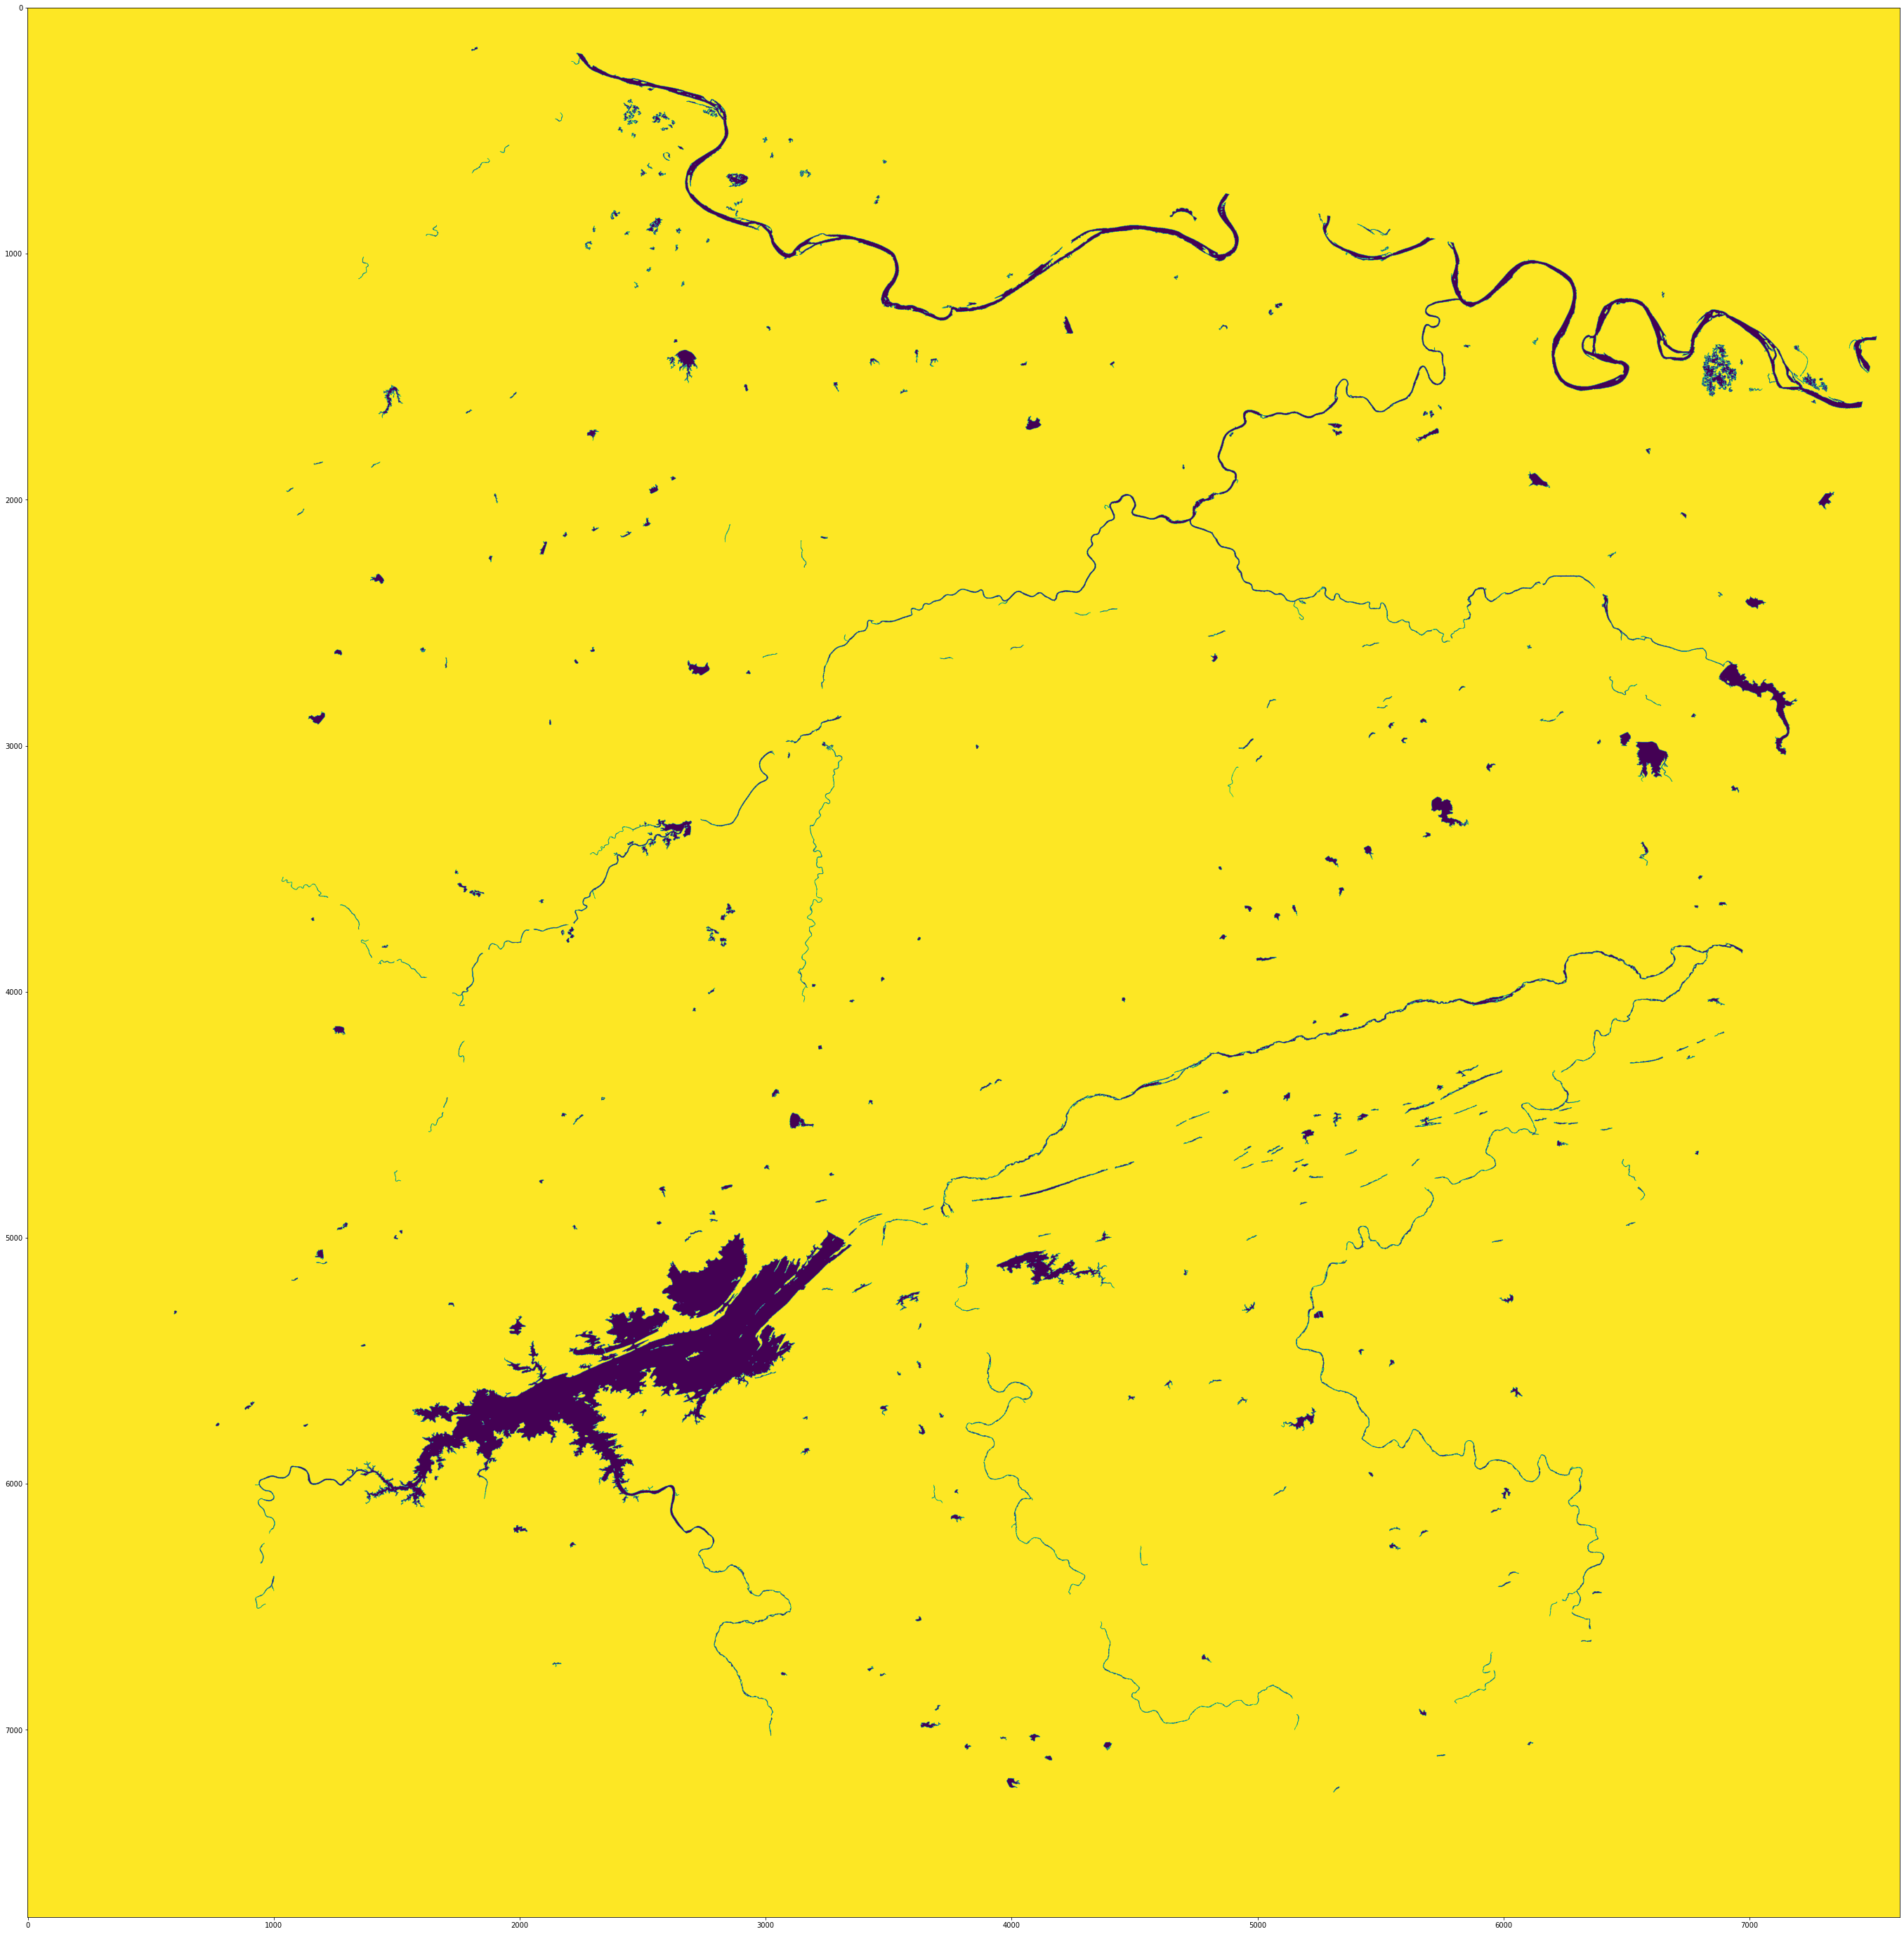

In [77]:
img = cv2.threshold(np.uint8(ndwi_copy), 0, 255, cv2.THRESH_BINARY)[1]

nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(img)
sizes = stats[1:, -1]
nb_components = nb_components - 1

min_size = 100

ndwi_components = np.zeros((output.shape))
for i in range(0, nb_components):
    if sizes[i] >= min_size:
        ndwi_components[output == i + 1] = -100

plt.figure(figsize=(50, 50))
plt.imshow(ndwi_components)
